Dataset: 
https://archive.ics.uci.edu/ml/datasets/bank+marketing


Input variables:
### bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('c://PythonScripts/bank-additional-full.csv',sep=';')


# EDA

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.columns = df.columns.str.replace('.','_')

<ipython-input-4-5554f395516f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('.','_')


In [5]:
del df['duration']
df.describe()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.y = df.y.eq('yes').mul(1)

In [7]:
df.y.sum(), df.y.count()

(4640, 41188)

In [8]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:10])
    print(df[col].nunique())
    print()

age
[56 57 37 40 45 59 41 24 25 29]
78

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown']
12

marital
['married' 'single' 'divorced' 'unknown']
4

education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
8

default
['no' 'unknown' 'yes']
3

housing
['no' 'yes' 'unknown']
3

loan
['no' 'yes' 'unknown']
3

contact
['telephone' 'cellular']
2

month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
10

day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
5

campaign
[ 1  2  3  4  5  6  7  8  9 10]
42

pdays
[999   6   4   3   5   1   0  10   7   8]
27

previous
[0 1 2 3 4 5 6 7]
8

poutcome
['nonexistent' 'failure' 'success']
3

emp_var_rate
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
10

cons_price_idx
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893]
26

cons_conf_idx
[-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -

In [9]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

There are no missing values, there is category = "unknown". I decide to treat it as another category.

In [10]:
global_ratio = df.y.mean()
global_ratio

0.11265417111780131

In [11]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp_var_rate'}>,
        <AxesSubplot:title={'center':'cons_price_idx'}>],
       [<AxesSubplot:title={'center':'cons_conf_idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>,
        <AxesSubplot:title={'center':'nr_employed'}>],
       [<AxesSubplot:title={'center':'y'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

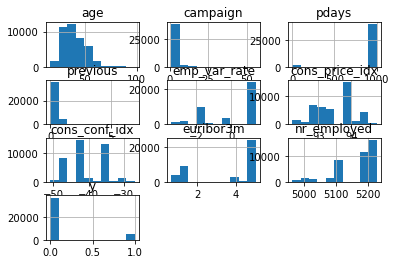

In [12]:
df.hist()

In [13]:
cat = list(df.dtypes[df.dtypes=='object'].index)
num = list(df.dtypes[df.dtypes!='object'].index)

In [14]:
cat, num

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome'],
 ['age',
  'campaign',
  'pdays',
  'previous',
  'emp_var_rate',
  'cons_price_idx',
  'cons_conf_idx',
  'euribor3m',
  'nr_employed',
  'y'])

In [15]:
from IPython.display import display

In [16]:
for c in cat:
    print(c)
    df_group = df.groupby(c).y.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_ratio
    df_group['positive'] = df_group['mean'] / global_ratio
    display(df_group)
    print()

job


,mean,count,diff,positive
job,,,,
admin.,0.129726,10422,0.017071,1.151538
blue-collar,0.068943,9254,-0.043711,0.611989
entrepreneur,0.085165,1456,-0.027489,0.755985
housemaid,0.100000,1060,-0.012654,0.887672
management,0.112175,2924,-0.000479,0.995747
retired,0.252326,1720,0.139671,2.239825
self-employed,0.104856,1421,-0.007798,0.930775
services,0.081381,3969,-0.031273,0.722394
student,0.314286,875,0.201632,2.789828



marital


,mean,count,diff,positive
marital,,,,
divorced,0.103209,4612,-0.009445,0.916158
married,0.101573,24928,-0.011082,0.901631
single,0.140041,11568,0.027387,1.243110
unknown,0.150000,80,0.037346,1.331509



education


,mean,count,diff,positive
education,,,,
basic.4y,0.102490,4176,-0.010164,0.909779
basic.6y,0.082024,2292,-0.030630,0.728108
basic.9y,0.078246,6045,-0.034408,0.694572
high.school,0.108355,9515,-0.004299,0.961839
illiterate,0.222222,18,0.109568,1.972605
professional.course,0.113485,5243,0.000830,1.007372
university.degree,0.137245,12168,0.024591,1.218288
unknown,0.145003,1731,0.032349,1.287151



default


,mean,count,diff,positive
default,,,,
no,0.12879,32588,0.016136,1.143231
unknown,0.05153,8597,-0.061125,0.457414
yes,0.00000,3,-0.112654,0.000000



housing


,mean,count,diff,positive
housing,,,,
no,0.108796,18622,-0.003858,0.965753
unknown,0.108081,990,-0.004573,0.959404
yes,0.116194,21576,0.003540,1.031421



loan


,mean,count,diff,positive
loan,,,,
no,0.113402,33950,0.000748,1.006639
unknown,0.108081,990,-0.004573,0.959404
yes,0.109315,6248,-0.003339,0.970359



contact


,mean,count,diff,positive
contact,,,,
cellular,0.147376,26144,0.034722,1.308217
telephone,0.052313,15044,-0.060341,0.464370



month


,mean,count,diff,positive
month,,,,
apr,0.204787,2632,0.092133,1.817840
aug,0.106021,6178,-0.006633,0.941122
dec,0.489011,182,0.376357,4.340816
jul,0.090466,7174,-0.022189,0.803038
jun,0.105115,5318,-0.007539,0.933074
mar,0.505495,546,0.392840,4.487135
may,0.064347,13769,-0.048307,0.571195
nov,0.101439,4101,-0.011215,0.900443
oct,0.438719,718,0.326064,3.894385



day_of_week


,mean,count,diff,positive
day_of_week,,,,
fri,0.108087,7827,-0.004567,0.959462
mon,0.099483,8514,-0.013171,0.883085
thu,0.121188,8623,0.008533,1.075748
tue,0.117800,8090,0.005146,1.045676
wed,0.116671,8134,0.004017,1.035654



poutcome


,mean,count,diff,positive
poutcome,,,,
failure,0.142286,4252,0.029632,1.263033
nonexistent,0.088322,35563,-0.024332,0.784011
success,0.651129,1373,0.538475,5.779892


### Mutual information



In [17]:
from sklearn.metrics import mutual_info_score

In [18]:
def mutual_info_succes_score(series):
    return mutual_info_score(series, df.y)

In [19]:
mut = df[cat].apply(mutual_info_succes_score)
mut.sort_values(ascending=False)

poutcome       0.030384
month          0.026407
contact        0.011646
job            0.009859
default        0.005774
education      0.002390
marital        0.001434
day_of_week    0.000322
housing        0.000069
loan           0.000013
dtype: float64

Removing: loan, housing, day of week


In [20]:
df_small = df.copy()
del df_small['loan']
del df_small['housing']
del df_small['day_of_week']

In [21]:
df_small

,age,job,marital,education,default,contact,month,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,cellular,nov,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,cellular,nov,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,cellular,nov,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,cellular,nov,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [22]:
df_small.columns

Index(['age', 'job', 'marital', 'education', 'default', 'contact', 'month',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [23]:
abs(df[num].corrwith(df.y)).sort_values(ascending=False)

y                 1.000000
nr_employed       0.354678
pdays             0.324914
euribor3m         0.307771
emp_var_rate      0.298334
previous          0.230181
cons_price_idx    0.136211
campaign          0.066357
cons_conf_idx     0.054878
age               0.030399
dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df_small,test_size = 0.2, random_state=1, stratify=df_small.y)

len(df_full_train), len(df_test), len(df_test)/len(df_full_train)
print(df_full_train.y.mean())
print(df_test.y.mean())


0.11265553869499241
0.11264870114105366


In [33]:
df_test

,age,job,marital,education,default,contact,month,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
30581,61,technician,divorced,professional.course,no,cellular,may,3,999,0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1,1
22655,58,technician,divorced,professional.course,no,cellular,aug,7,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
13181,30,admin.,married,high.school,no,cellular,jul,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
23689,29,admin.,single,university.degree,no,cellular,aug,4,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,0
23610,35,admin.,married,university.degree,no,cellular,aug,10,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11694,55,blue-collar,divorced,basic.9y,no,telephone,jun,6,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
11657,33,services,single,high.school,no,telephone,jun,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
40888,62,blue-collar,married,unknown,no,cellular,oct,3,999,0,nonexistent,-1.1,94.601,-49.5,0.972,4963.6,0
8195,42,admin.,single,high.school,no,telephone,jun,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,0


In [34]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=1,stratify=df_full_train.y)
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values
y_full_train = df_full_train.y.values
del df_train['y']
del df_val['y']
del df_test['y']
del df_full_train['y']
    

In [35]:
y_train.mean(), y_val.mean()

(0.11265781806409841, 0.11264870114105366)

In [39]:
df_train.reset_index()
df_val.reset_index()
df_test.reset_index()
df_full_train.reset_index()


,index,age,job,marital,education,default,contact,month,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,14304,25,blue-collar,single,high.school,no,cellular,jul,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
1,10075,40,admin.,married,high.school,no,telephone,jun,1,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1
2,23305,51,technician,married,university.degree,no,cellular,aug,5,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1
3,16105,37,blue-collar,married,high.school,unknown,cellular,jul,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1
4,22225,54,housemaid,married,university.degree,unknown,cellular,aug,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,15926,35,admin.,married,unknown,unknown,cellular,jul,3,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1
32946,16281,34,blue-collar,married,unknown,no,cellular,jul,13,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1
32947,37238,58,admin.,married,university.degree,no,telephone,aug,2,999,0,nonexistent,-2.9,92.201,-31.4,0.881,5076.2
32948,7105,50,services,divorced,basic.4y,unknown,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0


### Vectorize and training Logistic Regression model

In [40]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')

X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear", C=1.0, random_state=42)

In [42]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [43]:
list(zip(dv.get_feature_names(), model.coef_[0].round(3)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[('age', 0.004),
 ('campaign', -0.038),
 ('cons_conf_idx', 0.02),
 ('cons_price_idx', 0.37),
 ('contact=cellular', 0.243),
 ('contact=telephone', -0.241),
 ('default=no', 0.125),
 ('default=unknown', -0.122),
 ('default=yes', -0.0),
 ('education=basic.4y', -0.014),
 ('education=basic.6y', -0.029),
 ('education=basic.9y', -0.049),
 ('education=high.school', -0.022),
 ('education=illiterate', 0.002),
 ('education=professional.course', 0.042),
 ('education=university.degree', 0.06),
 ('education=unknown', 0.012),
 ('emp_var_rate', -0.234),
 ('euribor3m', -0.051),
 ('job=admin.', 0.001),
 ('job=blue-collar', -0.152),
 ('job=entrepreneur', -0.036),
 ('job=housemaid', -0.006),
 ('job=management', 0.003),
 ('job=retired', 0.147),
 ('job=self-employed', -0.007),
 ('job=services', -0.062),
 ('job=student', 0.067),
 ('job=technician', 0.043),
 ('job=unemployed', 0.02),
 ('job=unknown', -0.017),
 ('marital=divorced', -0.042),
 ('marital=married', -0.034),
 ('marital=single', 0.084),
 ('marital=un

In [44]:
model.intercept_[0]


0.002471252068048202

In [45]:
model.coef_[0].round(3)

array([ 0.004, -0.038,  0.02 ,  0.37 ,  0.243, -0.241,  0.125, -0.122,
       -0.   , -0.014, -0.029, -0.049, -0.022,  0.002,  0.042,  0.06 ,
        0.012, -0.234, -0.051,  0.001, -0.152, -0.036, -0.006,  0.003,
        0.147, -0.007, -0.062,  0.067,  0.043,  0.02 , -0.017, -0.042,
       -0.034,  0.084, -0.006,  0.013,  0.052,  0.024,  0.265,  0.094,
        0.273, -0.606, -0.093,  0.018, -0.036, -0.007, -0.001, -0.199,
        0.161,  0.041, -0.14 ])

In [69]:
y_pred = model.predict_proba(X_val)[:, 1]

In [47]:
succ_lvl = (y_pred>=0.5)

In [48]:
accu = (y_val == succ_lvl).mean()

In [49]:
accu

0.9020393299344501

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(succ_lvl,y_val)

0.9020393299344501

In [51]:
dv = DictVectorizer(sparse=False)

dicts_full_train = df_full_train.to_dict(orient='records')
dicts_test = df_test.to_dict(orient='records')

X_full_train = dv.fit_transform(dicts_full_train)
X_test = dv.transform(dicts_test)
model = LogisticRegression(solver="liblinear", C=1.0, random_state=42)
model.fit(X_full_train, y_full_train)

LogisticRegression(random_state=42, solver='liblinear')

In [52]:
y_pred_test = model.predict_proba(X_test)[:, 1]

In [53]:
succ_lvl = (y_pred_test>=0.5)
accu = (y_test == succ_lvl).mean()
accu

0.9019179412478757

In [54]:
accu

0.9019179412478757

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(succ_lvl,y_val)

0.8630735615440641

In [56]:
thresholds = np.linspace(0,1,101)
dane_do_wykr_x = []
dane_do_wykr_y = []
for t in thresholds:
    
    y_bin = (y_pred>=t)
    score = (y_val == y_bin).mean()
    dane_do_wykr_x.append(t)
    dane_do_wykr_y.append(score)

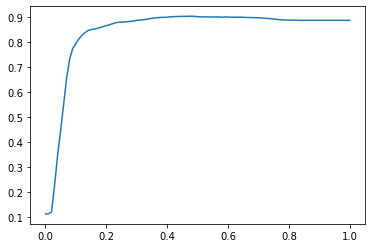

In [57]:
plt.plot(dane_do_wykr_x,dane_do_wykr_y)

In [58]:
thresholds = np.linspace(0,1,21)
actual_positive = (y_val ==1)
actual_negative = (y_val == 0)
dane_do_wykr = []
for t in thresholds:
    
    predict_positive = (y_pred >=t)
    predict_negative = (y_pred<t)
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    prec = round(tp/(tp+fp),3)
    rec = round(tp / (tp+fn),3)
    print(round(t,2), prec, rec)

    dane_do_wykr.append((round(t,2), prec, rec))

0.0 0.113 1.0
0.05 0.155 0.878
0.1 0.306 0.651
0.15 0.39 0.577
0.2 0.425 0.541
0.25 0.467 0.452
0.3 0.499 0.425
0.35 0.556 0.361
0.4 0.604 0.328
0.45 0.658 0.294
0.5 0.7 0.228
0.55 0.731 0.188
0.6 0.774 0.166
0.65 0.798 0.144
0.7 0.81 0.12
0.75 0.885 0.058
0.8 0.846 0.012
0.85 nan 0.0
0.9 nan 0.0
0.95 nan 0.0
1.0 nan 0.0


<ipython-input-58-53193a559f9e>:13: RuntimeWarning: invalid value encountered in long_scalars
  prec = round(tp/(tp+fp),3)


In [59]:
t = 0.35
predict_positive = (y_pred >=t)
predict_negative = (y_pred<t)
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()
prec = round(tp/(tp+fp),3)
rec = round(tp / (tp+fn),3)
fp+fn

861

In [60]:
t = 0.2
predict_positive = (y_pred >=t)
predict_negative = (y_pred<t)
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()


conf_matrix = np.array([[tn,fp],[fn,tp]])
               
(conf_matrix/conf_matrix.sum()).round(2)

array([[0.81, 0.08],
       [0.05, 0.06]])

In [61]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_val,y_pred)
auc

0.7877520018632954

In [63]:
for series in df_train:
    new_df_train = df_train.copy()
    new_df_val = df_val.copy()
    new_df_train = new_df_train.drop(series,1)
    new_df_val = new_df_val.drop(series,1)
    train_dict = new_df_train.to_dict(orient='records')
    val_dict =new_df_val.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dict)
    X_val = dv.transform(val_dict)
    model = LogisticRegression(solver="liblinear", C=1.0, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    price_level = (y_pred>= 0.5)
    accu = (y_val == price_level).mean()
    
    print(f"accu without {series} is: {accu}. Difference vs full-features-train is: {abs(accu-0.9019179412478757)}")

accu without age is: 0.902282107307599. Difference vs full-features-train is: 0.00036416605972322547
accu without job is: 0.9017965525613013. Difference vs full-features-train is: 0.00012138868657440849
accu without marital is: 0.902282107307599. Difference vs full-features-train is: 0.00036416605972322547
accu without education is: 0.9017965525613013. Difference vs full-features-train is: 0.00012138868657440849
accu without default is: 0.9019179412478757. Difference vs full-features-train is: 0.0
accu without contact is: 0.902282107307599. Difference vs full-features-train is: 0.00036416605972322547
accu without month is: 0.902282107307599. Difference vs full-features-train is: 0.00036416605972322547
accu without campaign is: 0.9017965525613013. Difference vs full-features-train is: 0.00012138868657440849
accu without pdays is: 0.900825443068706. Difference vs full-features-train is: 0.0010924981791696764
accu without previous is: 0.9015537751881525. Difference vs full-features-train 

In [65]:
for series in df_train:
    new_df_train = df_train.copy()
    new_df_val = df_val.copy()
    new_df_train = new_df_train.drop(series,1)
    new_df_val = new_df_val.drop(series,1)
    train_dict = new_df_train.to_dict(orient='records')
    val_dict =new_df_val.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dict)
    X_val = dv.transform(val_dict)
    model = LogisticRegression(solver="liblinear", C=1.0, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    #price_level = (y_pred>= 0.5)
    #accu = (y_val == price_level).mean()
    auc = roc_auc_score(y_val,y_pred)
    print(f"auc without {series} is: {auc}. Difference vs full-features-train is: {abs(auc-0.7877520018632954)}")

auc without age is: 0.7690011173876126. Difference vs full-features-train is: 0.01875088447568285
auc without job is: 0.7849174784187933. Difference vs full-features-train is: 0.0028345234445020795
auc without marital is: 0.7878722168498513. Difference vs full-features-train is: 0.0001202149865558999
auc without education is: 0.7852179790320298. Difference vs full-features-train is: 0.002534022831265581
auc without default is: 0.7842261132600594. Difference vs full-features-train is: 0.0035258886032359937
auc without contact is: 0.779818992051512. Difference vs full-features-train is: 0.007933009811783465
auc without month is: 0.7659868242605784. Difference vs full-features-train is: 0.021765177602717012
auc without campaign is: 0.7859108183169018. Difference vs full-features-train is: 0.001841183546393621
auc without pdays is: 0.7881840682343507. Difference vs full-features-train is: 0.0004320663710553063
auc without previous is: 0.7845316259021651. Difference vs full-features-train i

In [66]:
for series in df_full_train:
    new_df_full_train = df_full_train.copy()
    new_df_test = df_test.copy()
    new_df_full_train = new_df_full_train.drop(series,1)
    new_df_test = new_df_test.drop(series,1)
    full_train_dict = new_df_full_train.to_dict(orient='records')
    test_dict =new_df_test.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_full_train = dv.fit_transform(full_train_dict)
    X_test = dv.transform(test_dict)
    model = LogisticRegression(solver="liblinear", C=1.0, random_state=42)
    model.fit(X_full_train, y_full_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    succ_level = (y_pred>= 0.5)
    accu = (y_test == succ_level).mean()
    auc = roc_auc_score(y_test,y_pred)
    print(f"auc without {series} is: {auc}. Difference vs full-features-train is: {abs(auc-0.7877520018632954)}")

auc without age is: 0.7871254982546347. Difference vs full-features-train is: 0.0011047059104498658
auc without job is: 0.7880571459738668. Difference vs full-features-train is: 0.00017305819121782307
auc without marital is: 0.78689678758432. Difference vs full-features-train is: 0.0013334165807645793
auc without education is: 0.7867405302136894. Difference vs full-features-train is: 0.0014896739513952095
auc without default is: 0.7851441990188216. Difference vs full-features-train is: 0.0030860051462630045
auc without contact is: 0.7854180179489598. Difference vs full-features-train is: 0.002812186216124779
auc without month is: 0.777935353672343. Difference vs full-features-train is: 0.010294850492741592
auc without campaign is: 0.7868463724703996. Difference vs full-features-train is: 0.0013838316946850338
auc without pdays is: 0.7822834361290627. Difference vs full-features-train is: 0.005946768036021899
auc without previous is: 0.7863575522430303. Difference vs full-features-train

In [70]:
thresholds = np.linspace(0,1,101)
actual_positive = (y_val ==1)
actual_negative = (y_val == 0)
dane_do_wykr_f1 = []
for t in thresholds:
    predict_positive = (y_pred >=t)
    predict_negative = (y_pred<t)
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    prec = round(tp/(tp+fp),3)
    rec = round(tp / (tp+fn),3)
    F1 = 2 * prec*rec/(prec+rec)
    print(round(t,2), F1)
    dane_do_wykr_f1.append((round(t,2), F1))

0.0 0.20305480682839175
0.01 0.20305480682839175
0.02 0.20897440585009142
0.03 0.2300428305400373
0.04 0.2403704396632367
0.05 0.25681381957773514
0.06 0.2864990059642147
0.07 0.3260540540540541
0.08 0.3661871101871102
0.09 0.39565975103734446
0.1 0.4062396694214876
0.11 0.4170020746887967
0.12 0.4310519750519751
0.13 0.44598970133882593
0.14 0.45638469493278183
0.15 0.4678239508700102
0.16 0.47021903787103375
0.17 0.4738590398365679
0.18 0.47923625254582475
0.19 0.4787255909558068
0.2 0.477184265010352
0.21 0.47725286160249736
0.22 0.4757989528795811
0.23 0.47369863013698627
0.24 0.4746968421052632
0.25 0.4714358430540827
0.26 0.4699978723404255
0.27 0.46982765957446815
0.28 0.46852025586353946
0.29 0.46732123799359654
0.3 0.46147255113024754
0.31 0.4501207464324918
0.32 0.4447700770077008
0.33 0.43647216035634745
0.34 0.43732819383259913
0.35 0.4316835164835165
0.36 0.427218441273326
0.37 0.4238239130434783
0.38 0.42527486631016037
0.39 0.41131378935939195
0.4 0.40673922413793107
0.4

<ipython-input-70-96b9c87ddcda>:12: RuntimeWarning: invalid value encountered in long_scalars
  prec = round(tp/(tp+fp),3)


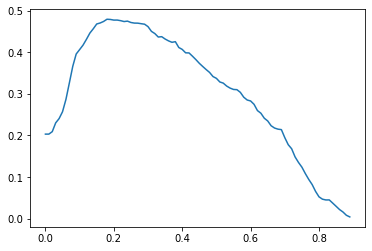

In [71]:
x_plot = [x[0] for x in dane_do_wykr_f1]
y_plot = [x[1] for x in dane_do_wykr_f1]
plt.plot(x_plot,y_plot)        

In [72]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_val,y_pred)

In [73]:
auc

0.7879462916882871

In [74]:

dv = DictVectorizer(sparse=False)

dicts_full_train = df_full_train.to_dict(orient='records')
dicts_test = df_test.to_dict(orient='records')

X_full_train = dv.fit_transform(dicts_full_train)
X_test = dv.transform(dicts_test)
model = LogisticRegression(solver="liblinear", C=1.0, random_state=42)
model.fit(X_full_train, y_full_train)

LogisticRegression(random_state=42, solver='liblinear')

In [75]:
y_pred_test = model.predict_proba(X_test)[:, 1]

In [76]:
succ_lvl = (y_pred_test>=0.5)
accu = (y_test == succ_lvl).mean()
accu

0.9019179412478757

In [77]:
auc = roc_auc_score(y_test,y_pred_test)
auc

0.7869276705269116

   ## DECISION TREE MODEL
   

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text


In [79]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [144]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df,test_size = 0.2, random_state=1,stratify=df.y)

print(df_full_train.y.mean())
print(df_test.y.mean())

0.11265553869499241
0.11264870114105366


In [145]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=1,stratify=df_full_train.y)
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values
y_full_train = df_full_train.y.values


del df_train['y']
del df_val['y']
del df_test['y']
del df_full_train['y']

In [154]:
dv = DictVectorizer(sparse=False)
train_dicts = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dict)

In [155]:
len(dv.get_feature_names_out())

62

In [156]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)
    

0.7495473695693193

In [157]:
max_depth_roc = []
for md in range(1,15):
    dt = DecisionTreeClassifier(max_depth=md)
    dt.fit(X_train,y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    auc_val = roc_auc_score(y_val, y_pred)
    
    y_pred_t = dt.predict_proba(X_train)[:,1]
    auc_train = roc_auc_score(y_train, y_pred_t)
    max_depth_roc.append((md,round(auc_train,3),round(auc_val,3)))

In [158]:
max_depth_roc

[(1, 0.702, 0.694),
 (2, 0.746, 0.744),
 (3, 0.754, 0.75),
 (4, 0.761, 0.754),
 (5, 0.789, 0.774),
 (6, 0.799, 0.778),
 (7, 0.807, 0.768),
 (8, 0.817, 0.754),
 (9, 0.826, 0.732),
 (10, 0.836, 0.715),
 (11, 0.85, 0.681),
 (12, 0.865, 0.67),
 (13, 0.88, 0.653),
 (14, 0.896, 0.633)]

In [159]:
print(export_text(dt, feature_names = dv.get_feature_names()))


|--- nr_employed <= 5087.65
|   |--- pdays <= 15.50
|   |   |--- day_of_week=mon <= 0.50
|   |   |   |--- nr_employed <= 5049.85
|   |   |   |   |--- campaign <= 3.50
|   |   |   |   |   |--- month=jun <= 0.50
|   |   |   |   |   |   |--- month=oct <= 0.50
|   |   |   |   |   |   |   |--- cons_conf_idx <= -33.80
|   |   |   |   |   |   |   |   |--- job=self-employed <= 0.50
|   |   |   |   |   |   |   |   |   |--- age <= 39.50
|   |   |   |   |   |   |   |   |   |   |--- pdays <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- pdays >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- age >  39.50
|   |   |   |   |   |   |   |   |   |   |--- job=services <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- job=services >  0.50
|   |   |   |   |   |   |   |   | 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [160]:
leaf_min_roc_with_maxdepth = []
for md in [3,4,5,6,7,8,9,10,15,20,None]:
    for s in [5,10,25,50,75,100,150,200,300,400,500,1000,2000]:
        dt = DecisionTreeClassifier(max_depth=md, min_samples_leaf=s)
        dt.fit(X_train,y_train)
        y_pred = dt.predict_proba(X_val)[:,1]
        auc_val = roc_auc_score(y_val, y_pred)
    
    #    y_pred_t = dt.predict_proba(X_train)[:,1]
    #    auc_train = roc_auc_score(y_train, y_pred_t)
        leaf_min_roc_with_maxdepth.append((md,s,round(auc_val,3)))

In [161]:
df_dectree_score = pd.DataFrame(leaf_min_roc_with_maxdepth,columns = ['max_depth','min_leaf','auc'])

In [162]:
df_dectree_score.sort_values(by='auc',ascending=False).head(10)

,max_depth,min_leaf,auc
98,10.0,200,0.795
137,NaN,200,0.794
111,15.0,200,0.794
124,20.0,200,0.794
123,20.0,150,0.793
84,9.0,150,0.793
85,9.0,200,0.793
136,NaN,150,0.793
110,15.0,150,0.793
71,8.0,150,0.792


In [163]:
df_dectree_score_pivot = df_dectree_score.pivot(index='min_leaf', columns='max_depth',values=['auc'])
df_dectree_score_pivot

auc                                                          \
max_depth    NaN   3.0    4.0    5.0    6.0    7.0    8.0    9.0    10.0   
min_leaf                                                                   
5          0.700  0.750  0.754  0.776  0.780  0.779  0.775  0.757  0.746   
10         0.735  0.750  0.754  0.776  0.779  0.777  0.776  0.768  0.768   
25         0.766  0.750  0.753  0.779  0.785  0.785  0.784  0.783  0.781   
50         0.772  0.747  0.774  0.781  0.784  0.783  0.782  0.781  0.785   
75         0.777  0.747  0.774  0.782  0.783  0.783  0.783  0.780  0.786   
100        0.775  0.747  0.774  0.781  0.784  0.784  0.783  0.783  0.785   
150        0.793  0.770  0.781  0.786  0.787  0.792  0.792  0.793  0.791   
200        0.794  0.771  0.781  0.786  0.787  0.791  0.791  0.793  0.795   
300        0.791  0.771  0.779  0.784  0.785  0.787  0.789  0.791  0.792   
400        0.783  0.770  0.778  0.782  0.780  0.783  0.785  0.784  0.784   
500        0.785  0.769  0.777  0.781  0.781  0.784  0.784  0.783  0.784   
1000       0.782  0.766  0.773  0.777  0.779  0.780  0.782  0.782  0.782   
2000       0.779  0.773  0.777  0.779  0.779  0.779  0.779  0.779  0.779   

                         
max_depth   15.0   20.0  
min_leaf                 
5          0.712  0.698  
10         0.747  0.735  
25         0.772  0.770  
50         0.778  0.776  
75         0.779  0.778  
100        0.778  0.775  
150        0.793  0.793  
200        0.794  0.794  
300        0.791  0.791  
400        0.783  0.783  
500        0.785  0.785  
1000       0.782  0.782  
2000       0.779  0.779

In [164]:
import seaborn as sns

<AxesSubplot:xlabel='None-max_depth', ylabel='min_leaf'>

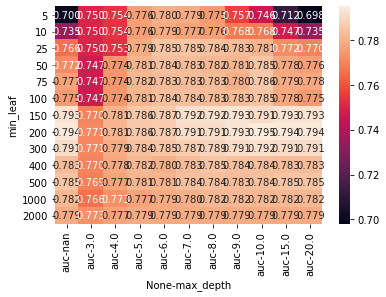

In [165]:
sns.heatmap(df_dectree_score_pivot, annot=True, fmt='.3f')

### FINAL DECISION TREE MODEL

In [166]:
dt = DecisionTreeClassifier(max_depth=10,min_samples_leaf=200)

In [167]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=200)

In [168]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.7947630931883578

Best auc is 0.795 - no significant difference between decregression and tree decision model

In [169]:
succ_lvl = (y_pred>=0.5)
accu = (y_test == succ_lvl).mean()
accu

0.8525127458120904

0.0 0.20305480682839175
0.01 0.20924593128390598
0.02 0.22302919708029195
0.03 0.2344373831775701
0.04 0.2559127962085308
0.05 0.28732665330661317
0.06 0.29728499496475325
0.07 0.33678367346938776
0.08 0.35332179226069244
0.09 0.4046280991735537
0.1 0.4370726714431934
0.11 0.4532926829268293
0.12 0.4532926829268293
0.13 0.4658802030456852
0.14 0.47199191102123356
0.15 0.47199191102123356
0.16 0.4761133603238866
0.17 0.4761133603238866
0.18 0.4761133603238866
0.19 0.4761133603238866
0.2 0.4761133603238866
0.21 0.4761133603238866
0.22 0.47661020408163257
0.23 0.47661020408163257
0.24 0.49025708502024296
0.25 0.4947472306143001
0.26 0.4947472306143001
0.27 0.491805076142132
0.28 0.47986666666666666
0.29 0.47986666666666666
0.3 0.47986666666666666
0.31 0.47986666666666666
0.32 0.47986666666666666
0.33 0.47986666666666666
0.34 0.47986666666666666
0.35 0.4748701973001038
0.36 0.4748701973001038
0.37 0.4748701973001038
0.38 0.46115844700944386
0.39 0.43446254071661233
0.4 0.43446254071661233


<ipython-input-170-81a0430bfea7>:12: RuntimeWarning: invalid value encountered in long_scalars
  prec = round(tp/(tp+fp),3)


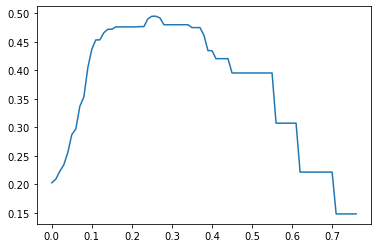

In [170]:
thresholds = np.linspace(0,1,101)
actual_positive = (y_val ==1)
actual_negative = (y_val == 0)
dane_do_wykr_f1 = []
for t in thresholds:
    predict_positive = (y_pred >=t)
    predict_negative = (y_pred<t)
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    prec = round(tp/(tp+fp),3)
    rec = round(tp / (tp+fn),3)
    F1 = 2 * prec*rec/(prec+rec)
    print(round(t,2), F1)
    dane_do_wykr_f1.append((round(t,2), F1))
x_plot = [x[0] for x in dane_do_wykr_f1]
y_plot = [x[1] for x in dane_do_wykr_f1]
plt.plot(x_plot,y_plot)        

In [179]:
dv = DictVectorizer(sparse=False)

dicts_full_train = df_full_train.to_dict(orient='records')
dicts_test = df_test.to_dict(orient='records')

X_full_train = dv.fit_transform(dicts_full_train)
X_test = dv.transform(dicts_test)
dt = DecisionTreeClassifier(max_depth=10,min_samples_leaf=200)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=200)

In [180]:
y_pred_test = dt.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_test)

0.7886703824472854

In [181]:
succ_lvl = (y_pred_test>=0.5)
accu = (y_test == succ_lvl).mean()
accu

0.9019179412478757

# RANDOM FOREST

In [182]:
from sklearn.ensemble import RandomForestClassifier

In [183]:
rf = RandomForestClassifier(n_estimators=20, max_depth=10,min_samples_leaf=200, random_state=1,n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=200, n_estimators=20,
                       n_jobs=-1, random_state=1)

In [184]:
y_pred = rf.predict_proba(X_val)[:,1]

In [185]:
roc_auc_score(y_val, y_pred)

0.7916633744516252

In [186]:
rf_auc_n = []

for n in range(10,210,10):
    rf = RandomForestClassifier(n_estimators=n, max_depth=9,min_samples_leaf=25, random_state=1,n_jobs=-1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    rf_auc_n.append((n,round(auc,3)))

In [187]:
rf_auc_n

[(10, 0.792),
 (20, 0.793),
 (30, 0.794),
 (40, 0.794),
 (50, 0.795),
 (60, 0.795),
 (70, 0.796),
 (80, 0.795),
 (90, 0.795),
 (100, 0.796),
 (110, 0.796),
 (120, 0.796),
 (130, 0.796),
 (140, 0.797),
 (150, 0.797),
 (160, 0.797),
 (170, 0.797),
 (180, 0.797),
 (190, 0.796),
 (200, 0.796)]

In [188]:
rf_auc_n = []

for n in range(10,210,10):
    for md in [4,6,8,10,12,14,16,20]:
        rf = RandomForestClassifier(n_estimators=n, max_depth=md,min_samples_leaf=25, random_state=1,n_jobs=-1)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        rf_auc_n.append((md,n,round(auc,3)))

In [194]:
df_rf_score = pd.DataFrame(rf_auc_n, columns = ['md','n','auc'])
df_rf_score.sort_values('auc',ascending=False).head(20)

,md,n,auc
34,16,60,0.799
104,12,180,0.799
88,16,150,0.799
106,16,180,0.799
40,16,70,0.799
35,20,60,0.799
52,16,90,0.799
112,16,190,0.799
53,20,90,0.799
92,12,160,0.799


In [195]:
rf_auc_n_s = []

for n in range(10,210,10):
    for s in [10,20,25,30,50,100,200]:
        rf = RandomForestClassifier(n_estimators=n, max_depth=16, min_samples_leaf=s, random_state=1,n_jobs=-1)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        rf_auc_n_s.append((s,n,round(auc,3)))

In [196]:
df_rf_score_s = pd.DataFrame(rf_auc_n_s, columns = ['m_leaf','n','auc'])
df_rf_score_s.sort_values('auc',ascending=False).head(10)

,m_leaf,n,auc
114,25,170,0.799
44,25,70,0.799
135,25,200,0.799
58,25,90,0.799
100,25,150,0.799
121,25,180,0.799
37,25,60,0.799
128,25,190,0.799
93,25,140,0.799
107,25,160,0.799


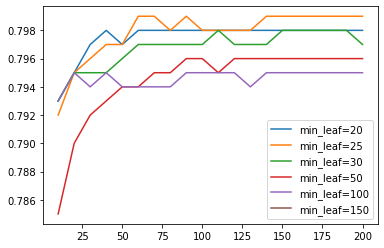

In [200]:
for s in [20,25,30,50,100,150]:
    df_subset = df_rf_score_s[df_rf_score_s.m_leaf == s]
    plt.plot(df_subset.n,df_subset.auc, label = 'min_leaf=%s' %s)
plt.legend()

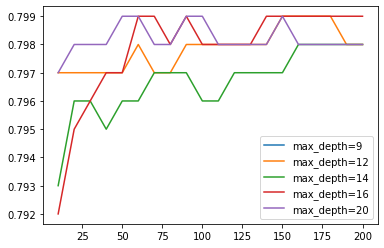

In [199]:
for d in [9, 12, 14, 16, 20]:
    df_subset = df_rf_score[df_rf_score.md == d]
    plt.plot(df_subset.n,df_subset.auc, label = 'max_depth=%s' %d)
plt.legend()

Lets's try max_features

In [202]:
rf_auc_max_feat = []

for m_f in range(1,20):
    rf = RandomForestClassifier(n_estimators=70, max_depth=16, min_samples_leaf=25 , random_state=1,n_jobs=-1, max_features = m_f)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    rf_auc_max_feat.append((m_f,n,round(auc,3)))

In [203]:
df_rf_max_feat = pd.DataFrame(rf_auc_max_feat, columns = ['max_feat','n','auc'])
df_rf_max_feat.sort_values('auc',ascending=False).head(10)

,max_feat,n,auc
10,11,200,0.801
13,14,200,0.801
18,19,200,0.800
17,18,200,0.799
16,17,200,0.799
6,7,200,0.799
12,13,200,0.799
14,15,200,0.798
9,10,200,0.798
8,9,200,0.797


## final RandomForest

In [209]:
rf = RandomForestClassifier(n_estimators=200, max_depth=16, min_samples_leaf=25, random_state=1,n_jobs=-1, max_features = 11)

200

In [210]:
rf.fit(X_full_train, y_full_train)
    
y_pred_test = rf.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred_test)
auc

0.8019321371291098

In [211]:
succ_lvl = (y_pred>=0.5)
accu = (y_test == succ_lvl).mean()
accu

0.8546977421704297

<ipython-input-212-588ae3b36ed3>:12: RuntimeWarning: invalid value encountered in long_scalars
  prec = round(tp/(tp+fp),3)


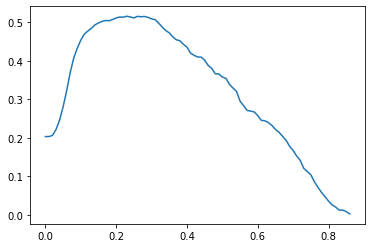

In [212]:
thresholds = np.linspace(0,1,101)
actual_positive = (y_test ==1)
actual_negative = (y_test == 0)
dane_do_wykr_f1 = []
for t in thresholds:
    predict_positive = (y_pred_test >=t)
    predict_negative = (y_pred_test<t)
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    prec = round(tp/(tp+fp),3)
    rec = round(tp / (tp+fn),3)
    F1 = 2 * prec*rec/(prec+rec)
    dane_do_wykr_f1.append((round(t,2), F1))
x_plot = [x[0] for x in dane_do_wykr_f1]
y_plot = [x[1] for x in dane_do_wykr_f1]
plt.plot(x_plot,y_plot)        

# XGBoost

In [213]:
import xgboost as xgb

In [214]:
dv = DictVectorizer(sparse=False)
train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [215]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
watch_list = [(dtrain, 'train'),(dval, 'val)')]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [256]:

xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 25,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, evals=watch_list, verbose_eval=5, num_boost_round=300)

[0]	train-auc:0.77989	val)-auc:0.77373
[5]	train-auc:0.78941	val)-auc:0.78413
[10]	train-auc:0.79286	val)-auc:0.78624
[15]	train-auc:0.79826	val)-auc:0.79161
[20]	train-auc:0.80152	val)-auc:0.79261
[25]	train-auc:0.80658	val)-auc:0.79478
[30]	train-auc:0.80834	val)-auc:0.79592
[35]	train-auc:0.81021	val)-auc:0.79754
[40]	train-auc:0.81214	val)-auc:0.79745
[45]	train-auc:0.81385	val)-auc:0.79850
[50]	train-auc:0.81492	val)-auc:0.79910
[55]	train-auc:0.81613	val)-auc:0.79920
[60]	train-auc:0.81763	val)-auc:0.80006
[65]	train-auc:0.81885	val)-auc:0.80040
[70]	train-auc:0.81982	val)-auc:0.80095
[75]	train-auc:0.82050	val)-auc:0.80116
[80]	train-auc:0.82133	val)-auc:0.80145
[85]	train-auc:0.82182	val)-auc:0.80174
[90]	train-auc:0.82245	val)-auc:0.80221
[95]	train-auc:0.82380	val)-auc:0.80301
[100]	train-auc:0.82404	val)-auc:0.80300
[105]	train-auc:0.82573	val)-auc:0.80365
[110]	train-auc:0.82634	val)-auc:0.80347
[115]	train-auc:0.82717	val)-auc:0.80365
[120]	train-auc:0.82764	val)-auc:0.803

In [217]:
auc_xgb_list = []
for et in [0.3,0.1,0.01]:
    xgb_params['eta'] = et
    model = xgb.train(xgb_params, dtrain, evals=watch_list, verbose_eval=5, num_boost_round=200)
    y_pred = model.predict(dval)
    auc = roc_auc_score(y_val,y_pred)
    auc_xgb_list.append((et,round(auc,3)))

[0]	train-auc:0.76089	val)-auc:0.75359
[5]	train-auc:0.80168	val)-auc:0.79282
[10]	train-auc:0.80636	val)-auc:0.79407
[15]	train-auc:0.81490	val)-auc:0.79934
[20]	train-auc:0.81952	val)-auc:0.80207
[25]	train-auc:0.82464	val)-auc:0.80275
[30]	train-auc:0.82795	val)-auc:0.80101
[35]	train-auc:0.83115	val)-auc:0.80095
[40]	train-auc:0.83341	val)-auc:0.80068
[45]	train-auc:0.83599	val)-auc:0.79984
[50]	train-auc:0.83803	val)-auc:0.80025
[55]	train-auc:0.83953	val)-auc:0.79980
[60]	train-auc:0.84091	val)-auc:0.80136
[65]	train-auc:0.84372	val)-auc:0.80124
[70]	train-auc:0.84400	val)-auc:0.80129
[75]	train-auc:0.84469	val)-auc:0.80160
[80]	train-auc:0.84623	val)-auc:0.80090
[85]	train-auc:0.84720	val)-auc:0.80065
[90]	train-auc:0.84794	val)-auc:0.80027
[95]	train-auc:0.84927	val)-auc:0.79995
[100]	train-auc:0.85025	val)-auc:0.79988
[105]	train-auc:0.85179	val)-auc:0.79991
[110]	train-auc:0.85300	val)-auc:0.79987
[115]	train-auc:0.85385	val)-auc:0.79913
[120]	train-auc:0.85478	val)-auc:0.799

In [219]:
def parse_xgb_output(output):
    results = []
    
    
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1]) 
        results.append((it,train,val))
                       
                       
    columns = ['num_iter','auc_train','auc_val']
    df_results = pd.DataFrame(results,columns=columns)
    return df_results

In [220]:
%%capture output
xgb_params = {
    'eta': 0.05, 
    'max_depth': 9,
    'min_child_weight': 20,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, evals=watch_list,  num_boost_round=100)

In [221]:
df_xgb = parse_xgb_output(output)

In [222]:
df_xgb

,num_iter,auc_train,auc_val
0,0,0.79101,0.78236
1,1,0.79134,0.78256
2,2,0.79372,0.78294
3,3,0.79358,0.78309
4,4,0.79393,0.78287
...,...,...,...
95,95,0.85146,0.80137
96,96,0.85169,0.80138
97,97,0.85187,0.80147
98,98,0.85208,0.80141


In [223]:
df_xgb.auc_train

0     0.79101
1     0.79134
2     0.79372
3     0.79358
4     0.79393
       ...   
95    0.85146
96    0.85169
97    0.85187
98    0.85208
99    0.85226
Name: auc_train, Length: 100, dtype: float64

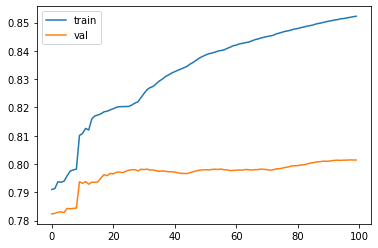

In [224]:
plt.plot(df_xgb.num_iter, df_xgb['auc_train'], label= 'train')
plt.plot(df_xgb.num_iter, df_xgb.auc_val, label= 'val')
plt.legend()


In [225]:
xgb_scores = {}

In [232]:
%%capture output
xgb_params = {
    'eta': 0.3, 
    'max_depth': 9,
    'min_child_weight': 20,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, evals=watch_list,  num_boost_round=200)

In [233]:
key = 'eta=%s' % (xgb_params['eta'])
xgb_scores[key] = parse_xgb_output(output)

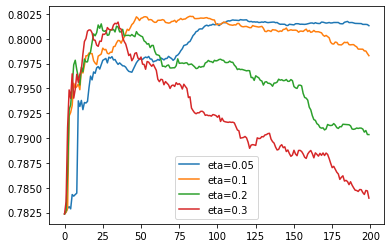

In [234]:
for key, df_scores in xgb_scores.items():
    plt.plot(df_scores.num_iter, df_scores['auc_val'], label= key)
#plt.ylim(0.4,1)
plt.legend()

### eta = 0.05 or 0.10

Now max_depth

In [237]:
xgb_scores = {}

In [252]:
%%capture output
xgb_params = {
    'eta': 0.05, 
    'max_depth': 20,
    'min_child_weight': 20,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, evals=watch_list,  num_boost_round=200)

In [253]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
xgb_scores[key] = parse_xgb_output(output)

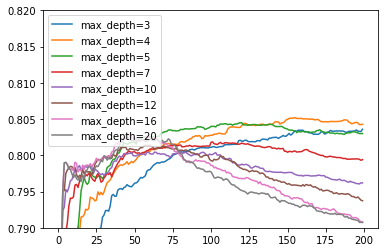

In [254]:
for key, df_scores in xgb_scores.items():
    plt.plot(df_scores.num_iter, df_scores['auc_val'], label= key)
plt.ylim(0.79,0.82)
plt.legend()

### max_depth = 4 or 5
Now  -  min_child_weight

In [257]:
xgb_scores = {}

In [266]:
%%capture output
xgb_params = {
    'eta': 0.05, 
    'max_depth': 4,
    'min_child_weight': 100,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, evals=watch_list,  num_boost_round=200)

In [267]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
xgb_scores[key] = parse_xgb_output(output)

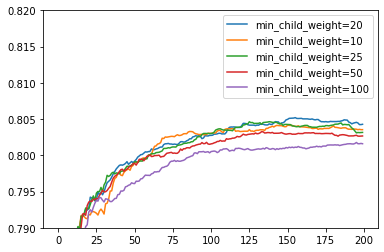

In [268]:
for key, df_scores in xgb_scores.items():
    plt.plot(df_scores.num_iter, df_scores['auc_val'], label= key)
plt.ylim(0.79,0.82)
plt.legend()

# FINAL MODEL - XGBOOST
### slightly better than rest of the trained models

In [305]:

xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 20,
    'colsample_bytree':0.5,
    'subsample': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1,
}

dv = DictVectorizer(sparse=False)
train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)


model = xgb.train(xgb_params, dtrain,  verbose_eval=5, num_boost_round=150)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [306]:
y_pred = model.predict(dval)

In [307]:
roc_auc_score(y_val, y_pred)

0.8051251680503797

In [308]:
y_pred

array([0.05158244, 0.03166132, 0.05742614, ..., 0.07671169, 0.02682673,
       0.07369833], dtype=float32)

In [297]:
full_train_dict = df_full_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
test_dict = df_test.to_dict(orient='records')
X_full_train = dv.fit_transform(full_train_dict)
X_test = dv.transform(test_dict)




In [298]:
#features = dv.get_feature_names()
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)
dtest = xgb.DMatrix(X_test,  feature_names=features)


In [299]:
y_pred = model.predict(dtest)


In [300]:
roc_auc_score(y_test, y_pred)

0.8005808794046889

0.0 0.20305480682839175
0.01 0.20305480682839175
0.02 0.20305480682839175
0.03 0.22138278388278385
0.04 0.24835181644359464
0.05 0.2874305283757338
0.06 0.3252721774193549
0.07 0.3663465045592705
0.08 0.4018356997971603
0.09 0.4304128256513027
0.1 0.44799203980099506
0.11 0.46011752988047805
0.12 0.4763509803921569
0.13 0.4830176817288802
0.14 0.48983365949119373
0.15 0.4978427184466019
0.16 0.502675701839303
0.17 0.506974951830443
0.18 0.5118775119617225
0.19 0.5159314285714285
0.2 0.51744
0.21 0.5149808061420346
0.22 0.5145909528392685
0.23 0.5179463601532566
0.24 0.5197858508604207
0.25 0.5152
0.26 0.5055621301775147
0.27 0.503357142857143
0.28 0.4998
0.29 0.4984593781344032
0.3 0.49298174442190673
0.31 0.4927971602434077
0.32 0.48263081695966903
0.33 0.4817001034126164
0.34 0.47985093167701864
0.35 0.4723689727463312
0.36 0.4631735889243876
0.37 0.4539590075512406
0.38 0.44848537378114844
0.39 0.43965179542981503
0.4 0.43001100110011
0.41 0.4311048648648649
0.42 0.42783638320775025

<ipython-input-279-7b39f1149aba>:13: RuntimeWarning: invalid value encountered in long_scalars
  prec = round(tp/(tp+fp),3)


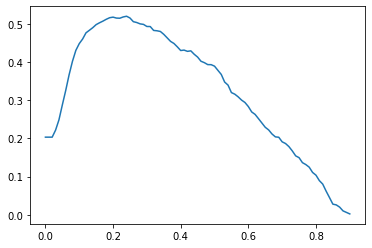

In [279]:

thresholds = np.linspace(0,1,101)
actual_positive = (y_test ==1)
actual_negative = (y_test == 0)
dane_do_wykr_f1 = []
prec_rec = []
for t in thresholds:
    predict_positive = (y_pred >=t)
    predict_negative = (y_pred<t)
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    prec = round(tp/(tp+fp),3)
    rec = round(tp / (tp+fn),3)
    F1 = 2 * prec*rec/(prec+rec)
    print(round(t,2), F1)
    prec_rec.append((t, prec,rec))
    dane_do_wykr_f1.append((round(t,2), F1))
x_plot = [x[0] for x in dane_do_wykr_f1]
y_plot = [x[1] for x in dane_do_wykr_f1]
plt.plot(x_plot,y_plot)        

In [282]:
succ_lvl = (y_pred>=0.5)
accu = (y_test == succ_lvl).mean()
accu

0.9037387715464918

In [283]:
live = df_test.iloc[-1].to_dict()


In [284]:
live_test = dv.transform(live)

In [285]:
live_test

array([[ 2.5000e+01,  1.0000e+00, -4.2700e+01,  9.3918e+01,  1.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         1.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  1.4000e+00,  4.9620e+00,  1.0000e+00,
         0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  5.2281e+03,  9.9900e+02,  0.0000e+00,  1.0000e+00,
         0.0000e+00,  0.0000e+00]])

In [286]:
dtest = xgb.DMatrix(live_test,  feature_names=features)
prediction = model.predict(dtest)

In [287]:
prediction

array([0.07204646], dtype=float32)

In [288]:
live

{'age': 25,
 'job': 'admin.',
 'marital': 'married',
 'education': 'high.school',
 'default': 'no',
 'housing': 'no',
 'loan': 'no',
 'contact': 'cellular',
 'month': 'jul',
 'day_of_week': 'wed',
 'campaign': 1,
 'pdays': 999,
 'previous': 0,
 'poutcome': 'nonexistent',
 'emp_var_rate': 1.4,
 'cons_price_idx': 93.918,
 'cons_conf_idx': -42.7,
 'euribor3m': 4.962,
 'nr_employed': 5228.1}

In [289]:
y_test[-1]

0

## SAVING THE MODEL

In [290]:
import pickle


In [291]:
with open('model_deposits.bin', 'wb') as f_out:
    pickle.dump((dv,model), f_out)

I decided to stay conservative and put the threshold at 0.5